# Erzeugen Synthetischer Bilddaten


In [2]:
#Import der Pakete
import os
import cv2
import PIL
from PIL import Image
import numpy as np
#import mxnet as mx: nützliches Paket, lässt sich leider nicht installieren (exotischer Fehler)
import skimage.io as io
import skimage.transform as transform
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle
from skimage import img_as_ubyte
%matplotlib inline
import random

In [3]:
#Read and show Image
import glob
path1 = glob.glob("F:/Projektseminar/Bildsammlung/*.jpg")
img_number=1

path= 'F:/Projektseminar/'

In [6]:
#Spieglen horizontal
for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    #hier die Methode
    a=img
    a = cv2.flip(img, 1)
    cv2.imwrite(os.path.join(path+"Mirr_Hor"+str(img_number)+".jpg"), a)
    img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()


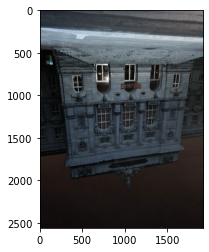

In [9]:
#Spieglen vertikal
for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    #hier die Methode
    b=img
    b = cv2.flip(img, 0)
    plt.imshow(b)
    cv2.imwrite(os.path.join(path+"Mirr_Ver"+str(img_number)+".jpg"), b)
    img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()


Rotieren: 5*Zufällig

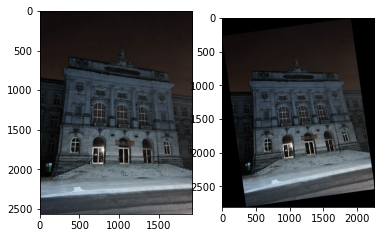

In [10]:
#Rotation
from scipy.ndimage import rotate
from scipy.misc import face
from matplotlib import pyplot as plt
import random

i=0
while i< 5:
    for file in path1:
        img1= cv2.imread(file)
        img=img_as_ubyte(img1)
        #cv2.imshow("Image",img)
        img1 = img
        angle=random.randint(-180,180)
        rot = rotate(img1, angle, reshape=True) #falls originale Bildgröße beibehalten werden soll: reshape=false
        #aber dann werden Bereiche des Bildes abgeschnitten
        cv2.imwrite(os.path.join(path+"RandomRotate_"+str(img_number)+".jpg"), rot)  #Speichername abändern!
        img_number +=1
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    i=i+1

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(rot)

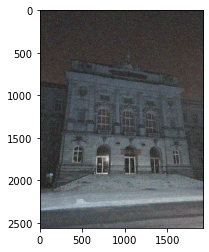

In [5]:
#Random Noise: Salt and Pepper
from skimage.util import random_noise

i=0
while i< 3:
    for file in path1:
        img1= cv2.imread(file)
        img=img_as_ubyte(img1)
        #cv2.imshow("Image",img)
        noise_img=random_noise(img, mode='s&p', amount=0.3)
        noise_img=np.array(255*noise_img, dtype= 'uint8')
        plt.imshow(noise_img)
        cv2.imwrite(os.path.join(path+"Noise_S&P1_"+str(img_number)+".jpg"), noise_img)  #Speichername abändern!
        img_number +=1
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    i=i+1

KeyboardInterrupt: 

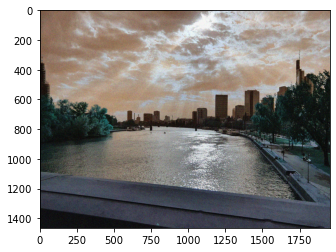

In [14]:
#!!!Random Noise: Gaussean Noise
from skimage.util import random_noise
i=0
while i< 3:
    for file in path1:
        img1= cv2.imread(file)
        img=img_as_ubyte(img1)
        #cv2.imshow("Image",img)
        random_noise=random_noise(img, mode='gaussian', seed=None, clip=True) #Amount kann bei Gauss nicht geändert werden
        noise_img=np.array(255*random_noise, dtype= 'uint8')
        plt.imshow(noise_img)
        cv2.imwrite(os.path.join(path+"Gauss_"+str(img_number)+".jpg"), noise_img)  #Speichername abändern!
        img_number +=1
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    i=i+1

In [21]:
from skimage.util import random_noise
i=2
while i< 3:
    for file in path1:
        img1= cv2.imread(file)
        img=img_as_ubyte(img1)
        random_noise1=random_noise(img, mode='gaussian', seed=None, clip=True)
        noise_img=np.array(255*random_noise1, dtype= 'uint8')
        cv2.imwrite(os.path.join(path+"Gauss_"+str(img_number)+".jpg"), noise_img)  #Speichername abändern!
        img_number +=1
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    i=i+1

In [15]:
from skimage.util import random_noise
random_noise=random_noise(img, mode='gaussian', seed=None, clip=True)
noise_img=np.array(255*random_noise, dtype= 'uint8')
cv2.imwrite(os.path.join(path+"Gauss_"+str(img_number)+".jpg"), noise_img)  #Speichername abändern!
print(type(img))

<class 'numpy.ndarray'>


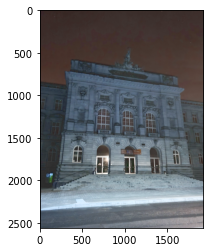

In [15]:
#Farbraumtransformation: Verändern der Helligkeit
def change_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v,value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

i=0 #Startwert für Anzahl der Durchläufe
BR_CN=-60 #Startwert der Helligkeit
while i< 7:
    for file in path1:
        img1= cv2.imread(file)
        img=img_as_ubyte(img1)
        BR_CN_File=str(BR_CN) #Conversion von Int zu String for Filename
        img2 = change_brightness(img, value=BR_CN) #increases
        plt.imshow(img2)
        cv2.imwrite(os.path.join(path+"Brightness_"+BR_CN_File+"_"+str(img_number)+".jpg"), img2)  #Speichername abändern!
        img_number +=1
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    BR_CN=BR_CN+20 #Erhöhung der Helligkeit pro Durchlauf (i)
    i=i+1

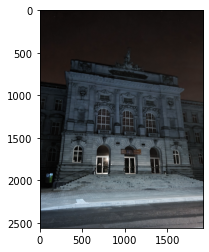

In [17]:
#Kernel Filter: 
#Schärfen mit 2 verschiedenen schärfe Kernel Filtern:
for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharp_img = cv2.filter2D(img, -1, kernel)
    plt.imshow(sharp_img)
    cv2.imwrite(os.path.join(path+"Sharp1_"+str(img_number)+".jpg"), sharp_img)  #Speichername abändern!
    img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()

for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
    sharp_img = cv2.filter2D(img, -1, kernel)
    plt.imshow(sharp_img)
    cv2.imwrite(os.path.join(path+"Sharp2_"+str(img_number)+".jpg"), sharp_img)  #Speichername abändern!
    img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()

#Blur mit 2 verschiedenen blur Kernel Filtern:
for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    kernel = np.array([[0.0625,0.125,0.0625], [0.125,0.25,0.125], [0.0625,0.125,0.0625]])
    blur_img = cv2.filter2D(img, -1, kernel)
    plt.imshow(sharp_img)
    cv2.imwrite(os.path.join(path+"Blur1_"+str(img_number)+".jpg"), blur_img)  #Speichername abändern!
    img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()

for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    kernel = np.array([[0.11111,0.11111,0.11111], [0.11111,0.11111,0.11111], [0.11111,0.11111,0.11111]])
    blur_img2 = cv2.filter2D(img, -1, kernel)
    plt.imshow(sharp_img)
    cv2.imwrite(os.path.join(path+"Blur2_"+str(img_number)+".jpg"), blur_img2)  #Speichername abändern!
    img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()


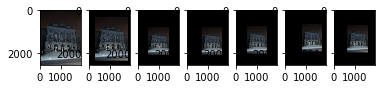

In [7]:
#Herauszoomen und verschieben ohne Teile des Bildes abzuschneiden:
#Herauszoomen 
from scipy.ndimage import zoom


def clipped_zoom(img, zoom_factor, **kwargs):

    h, w = img.shape[:2]

    # For multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # Zooming out
    if zoom_factor < 1:

        # Bounding box of the zoomed-out image within the output array
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        # Zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)

    # Zooming in
    elif zoom_factor > 1:

        # Bounding box of the zoomed-in region within the input array
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)

        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # If zoom_factor == 1, just return the input array
    else:
        out = img
    return out

for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    zm1 = clipped_zoom(img, 0.8)
    #Verschieben des Bildes
    rows,cols,ht = zm1.shape
    M = np.float32([[1,0,100],[0,1,50]]) #100 in x und 50 in y ist die Verschiebung des Bilds
    dst = cv2.warpAffine(zm1,M,(cols,rows))
    cv2.imwrite(os.path.join(path+"Trans1_"+str(img_number)+".jpg"), dst)  #Speichername abändern!
    img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()

for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    zm2 = clipped_zoom(img, 0.5)
    rows,cols,ht = zm2.shape
    M = np.float32([[1,0,0],[0,1,150]]) 
    dst2 = cv2.warpAffine(zm2,M,(cols,rows))
    
    cv2.imwrite(os.path.join(path+"Trans2_"+str(img_number)+".jpg"), dst2)  #Speichername abändern!
    img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()

for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    zm3 = clipped_zoom(img, 0.5)
    rows,cols,ht = zm3.shape
    M = np.float32([[1,0,200],[0,1,150]])
    dst3 = cv2.warpAffine(zm3,M,(cols,rows))
    cv2.imwrite(os.path.join(path+"Trans3_"+str(img_number)+".jpg"), dst3)  #Speichername abändern!
    img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()

for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    zm4 = clipped_zoom(img, 0.5)
    rows,cols,ht = zm4.shape
    M = np.float32([[1,0,30],[0,1,100]])
    dst4 = cv2.warpAffine(zm4,M,(cols,rows))
    cv2.imwrite(os.path.join(path+"Trans4_"+str(img_number)+".jpg"), dst4)  #Speichername abändern!
    img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()

for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    zm5 = clipped_zoom(img, 0.5)
    rows,cols,ht = zm5.shape
    M = np.float32([[1,0,300],[0,1,0]])
    dst5 = cv2.warpAffine(zm5,M,(cols,rows))
    cv2.imwrite(os.path.join(path+"Trans5_"+str(img_number)+".jpg"), dst5)  #Speichername abändern!
    img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()

for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    #cv2.imshow("Image",img)
    zm6 = clipped_zoom(img, 0.5)
    rows,cols,ht = zm6.shape
    M = np.float32([[1,0,150],[0,1,50]])
    dst6 = cv2.warpAffine(zm6,M,(cols,rows))
    cv2.imwrite(os.path.join(path+"Trans6_"+str(img_number)+".jpg"), dst6)  #Speichername abändern!
    img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()



fig, ax = plt.subplots(1, 7)
ax[0].imshow(img)
ax[1].imshow(dst)
ax[2].imshow(dst2)
ax[3].imshow(dst3)
ax[4].imshow(dst4)
ax[5].imshow(dst5)
ax[6].imshow(dst6)

In [4]:
for file in path1:
    img1= cv2.imread(file)
    img=img_as_ubyte(img1)
    x_rnd=random.randint(-500,500) #zufällige Verschiebung zwischen -500;500
    y_rnd=random.randint(-250,250)
    width, height= img1.size
    #cv2.imshow("Image",img)
    zm1 = clipped_zoom(img, 0.8)
    #Verschieben des Bildes
    rows,cols,ht = zm1.shape
    M = np.float32([[1,0,100],[0,1,50]]) #100 in x und 50 in y ist die Verschiebung des Bilds
    dst = cv2.warpAffine(zm1,M,(cols,rows))
    cv2.imwrite(os.path.join(path+"Trans1_"+str(img_number)+".jpg"), dst)  #Speichername abändern!
    img_number +=1
    cv2.waitKey(0)
    cv2.destroyAllWindows()

TypeError: cannot unpack non-iterable int object

**Anweisungen wie die Zoom und Transformieren Funktion generalisiert werden kann sind auf dem Surface in Onenote unter Psem; Synthetische Daten**